In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5

/content/drive/.shortcut-targets-by-id/1xGpwFZWnMwZbUXGO12RnmerSUHUra6SN/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5


In [3]:
!ls

iden_dmg_bdds_yolov5.ipynb  yolov5


#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [4]:
%cd /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5
!git clone https://github.com/ultralytics/yolov5  # clone repo

/content/drive/.shortcut-targets-by-id/1xGpwFZWnMwZbUXGO12RnmerSUHUra6SN/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5
fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
%cd /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5
# !git fetch&git pull

%pip install -qr requirements.txt  # install dependencies
#%pip uninstall -y wandb 

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


Setup complete. Using torch 1.11.0+cu113 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


# Create file dataset.yaml


In [6]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [18]:
%%writetemplate /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/data.yaml
# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/train
val: /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/valid
test: /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/valid

# Classes
nc: 4 #number of class will equal number of names
names: ['broke', 'decay', 'dent', 'scratch']

In [19]:
%cat /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/data.yaml

# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/train
val: /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/valid
test: /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/valid

# Classes
nc: 4 #number of class will equal number of names
names: ['broke', 'decay', 'dent', 'scratch']

In [9]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 145 kB 42.9 MB/s 
     |████████████████████████████████| 181 kB 59.7 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=38fff754f45bb2abb3a42f622f3ecca2855023df49a9e683d50d523dd93abbd3
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


# **Train**

### Model Small YOLOv5s
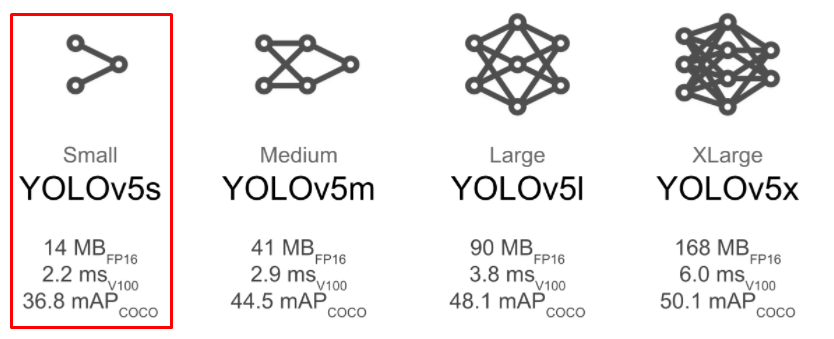

In [10]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [17]:
%cat /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/data.yaml

# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/train
val: /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/valid
test: /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/test

# Classes
nc: 4 #number of class will equal number of names
names: ['broke', 'decay', 'dent', 'scratch']

In [ ]:
%cd /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5

# !python train.py --img 640  --epochs 3 --data ./data/ford/everest/evrest.yaml --weights yolov5s.pt --name result_s
#epoch 150, train class = 10, test = 5-6




!python train.py --img 1280 --batch 16 --epochs 300 --data /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/data.yaml --weights yolov5s.pt --name result_dmg

/content/drive/.shortcut-targets-by-id/1xGpwFZWnMwZbUXGO12RnmerSUHUra6SN/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5
wandb: Currently logged in as: prppst. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=result_dmg, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-278-g1ab23

In [ ]:
%cd /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5

!python train.py --resume

/content/drive/.shortcut-targets-by-id/1xGpwFZWnMwZbUXGO12RnmerSUHUra6SN/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5
wandb: Currently logged in as: prppst. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=True, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing ob

# **test**

In [ ]:

%cd /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/
!python detect.py --weights /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/runs/train/result_dmg2/weights/best.pt --conf 0.25 --source /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/test/images --save-txt

/content/drive/MyDrive/iden_dmg_yolov5/yolov5
detect: weights=['/content/drive/MyDrive/iden_dmg_yolov5/yolov5/runs/train/result_dmg2/weights/best.pt'], source=/content/drive/MyDrive/iden_dmg_yolov5/yolov5/data/images/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-196-g614ef11 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/161 /content/drive/MyDrive/iden_dmg_yolov5/yolov5/data/images/test/images/2021050138421403.jpg: 480x640 1 scratch, Done. (0.011s)
image 2/161 /content/drive/MyDrive/iden_dmg_yolov5/yolov5/dat

##Export to ONNX

In [12]:
!cd /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5

In [14]:
!pip install -r /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/requirements.txt  # base requirements
!pip install coremltools>=4.1 onnx>=1.9.0 scikit-learn==0.19.2  # export requirements

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
!python /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/export.py --include onnx --weights /content/drive/MyDrive/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/runs/train/result_dmg/weights/best.pt --dynamic

export: data=data/coco128.yaml, weights=['/content/drive/MyDrive/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/runs/train/result_dmg/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, keras=False, optimize=False, int8=False, dynamic=True, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v6.1-278-g1ab23fc Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
Model summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/drive/MyDrive/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/runs/train/result_dmg/weights/best.pt with output shape (1, 25200, 9) (14.2 MB)

ONNX: starting export with onnx 1.12.0...
ONNX: export success, saved as /content/drive/MyDrive/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/runs/train/result_dmg/weights/best.onnx (26.8 MB)



In [25]:

%cd /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/
!python detect.py --weights /content/drive/MyDrive/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/runs/train/result_dmg/weights/best.onnx --conf 0.027 --source /content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/valid/images --save-txt

/content/drive/.shortcut-targets-by-id/1xGpwFZWnMwZbUXGO12RnmerSUHUra6SN/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5
detect: weights=['/content/drive/MyDrive/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/runs/train/result_dmg/weights/best.onnx'], source=/content/drive/MyDrive/INtern/Project/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/data/images/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.027, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-278-g1ab23fc Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Loading /content/drive/MyDrive/cardamageidentification/iden_dmg_bdds_yolov5/yolov5/runs/train/result_dmg/weights/best.o